First 5 rows of feature data (X):
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2   

C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Marital Status'] = X['Marital Status'].apply(lambda x: 1 if x == 2 else 0)
C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])
C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

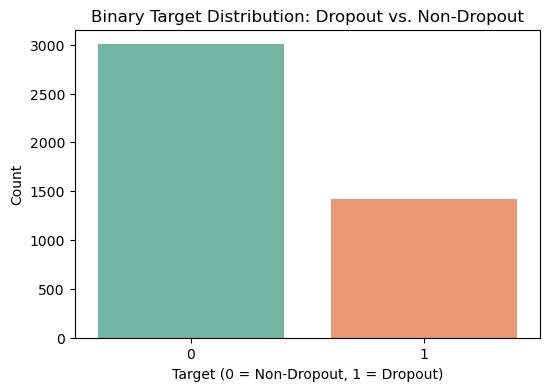

C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[column], palette='Set2')


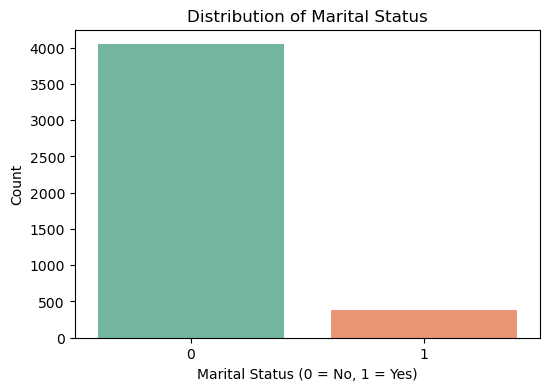

C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[column], palette='Set2')


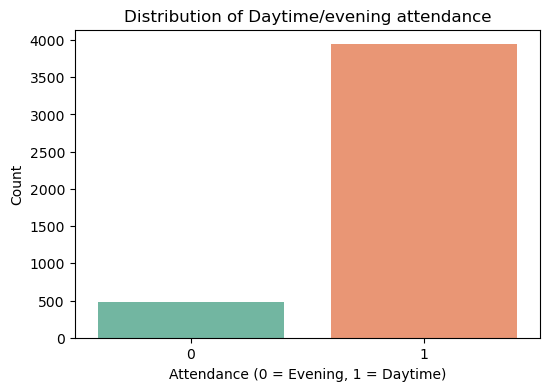

C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[column], palette='Set2')


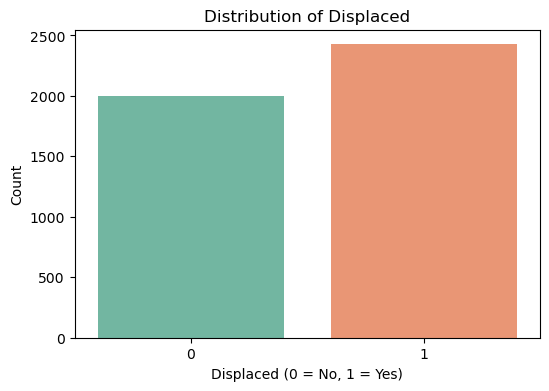

C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[column], palette='Set2')


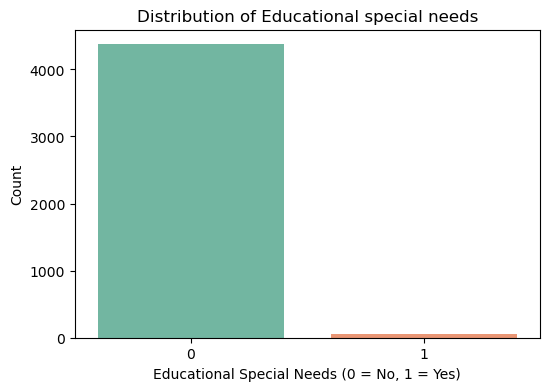

C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[column], palette='Set2')


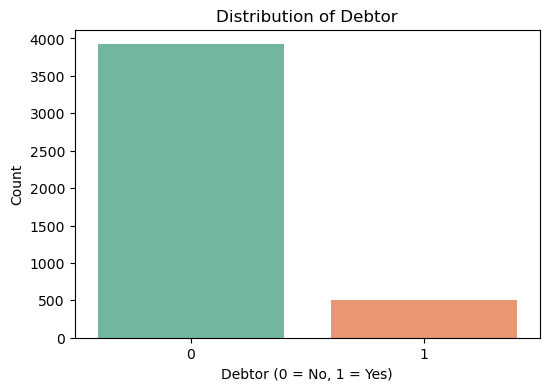

C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[column], palette='Set2')


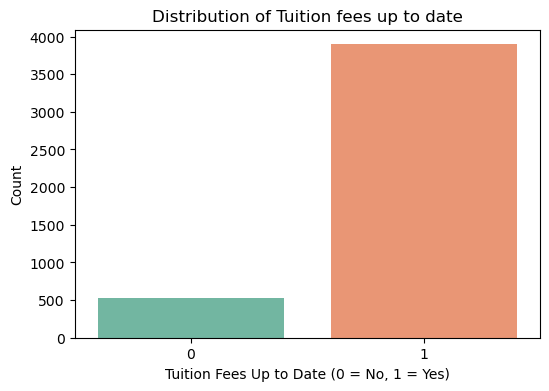

C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[column], palette='Set2')


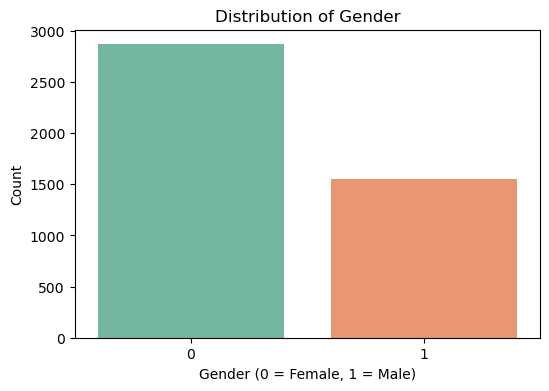

C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[column], palette='Set2')


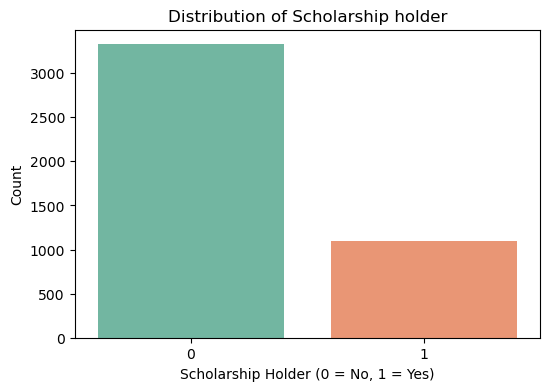

C:\Users\mraml\AppData\Local\Temp\ipykernel_22112\836495474.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[column], palette='Set2')


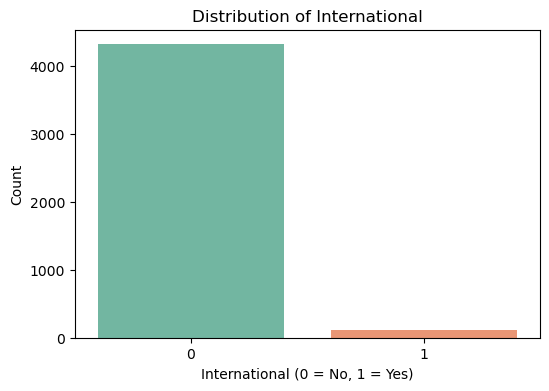

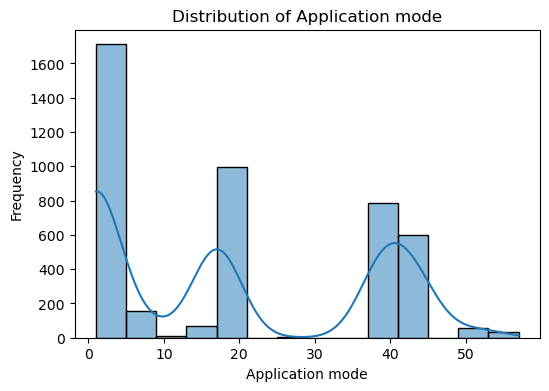

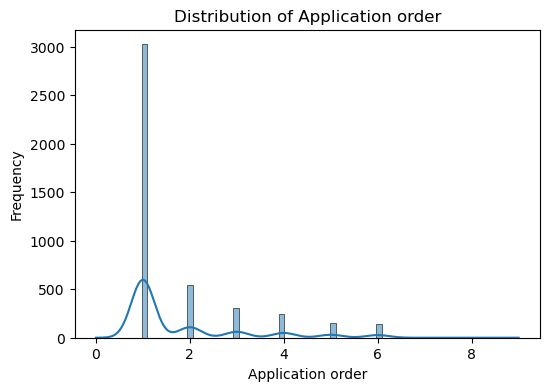

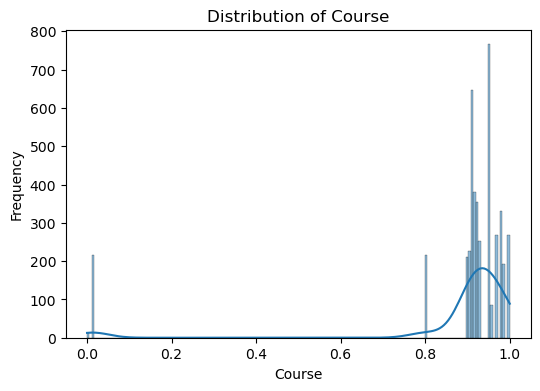

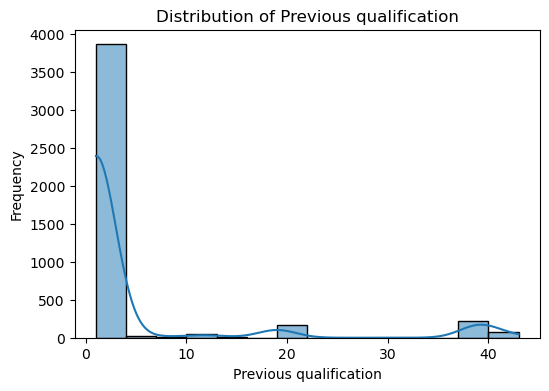

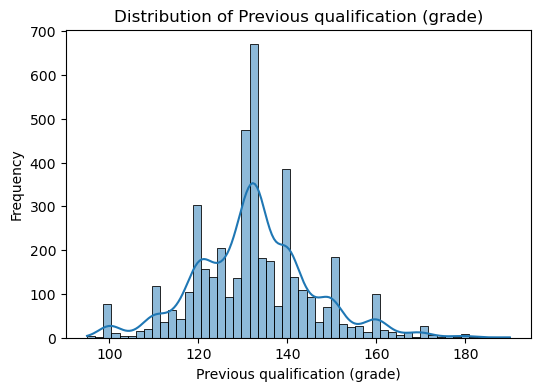

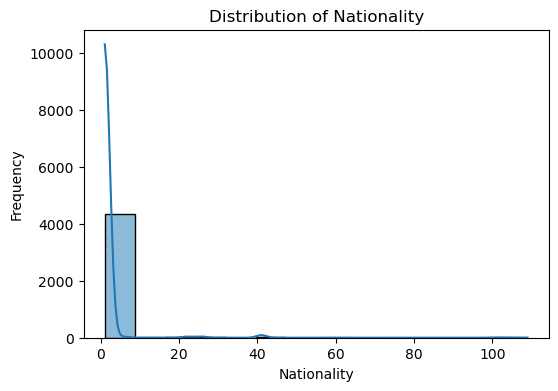

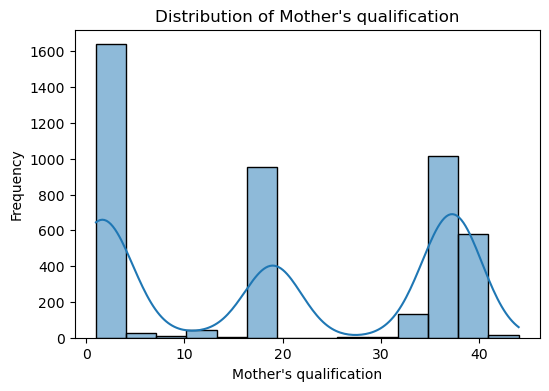

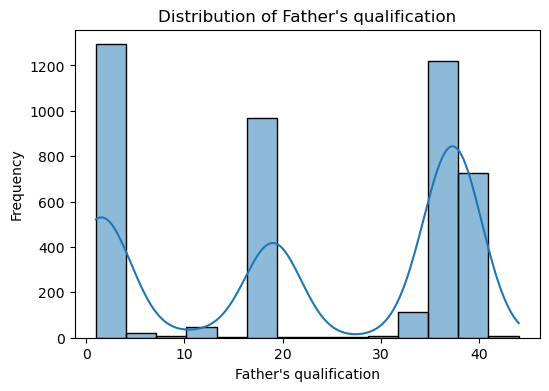

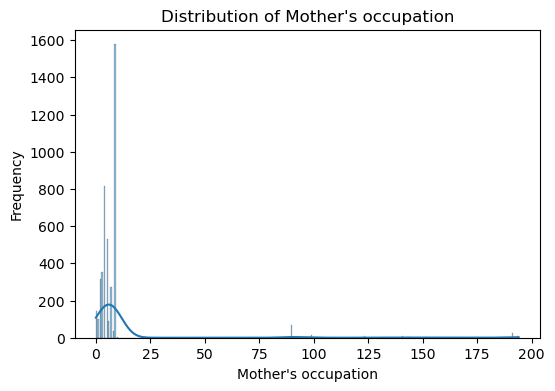

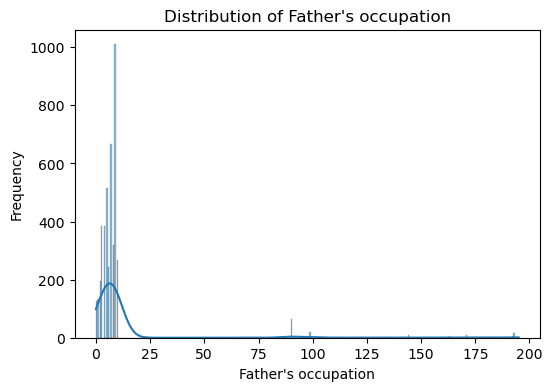

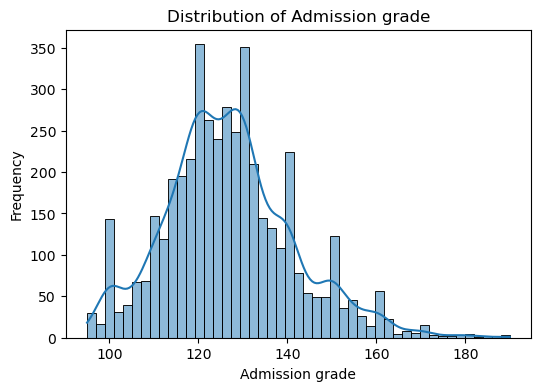

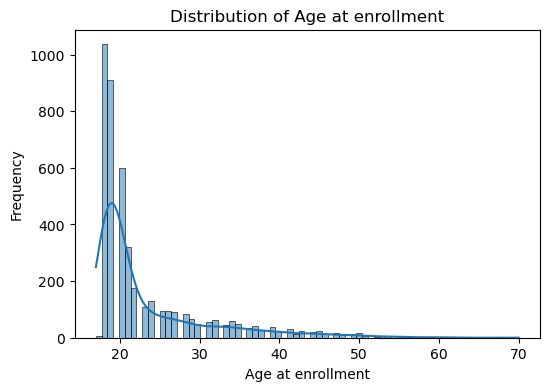

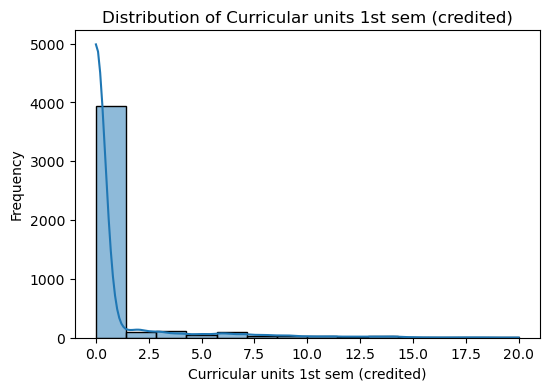

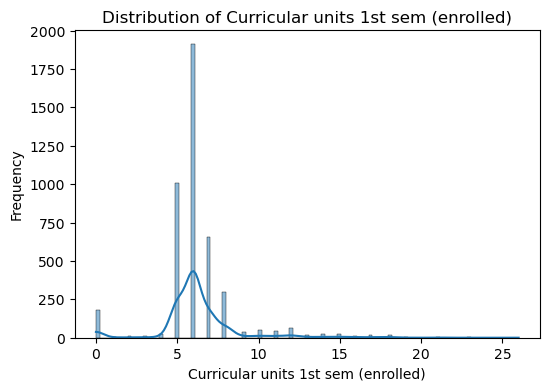

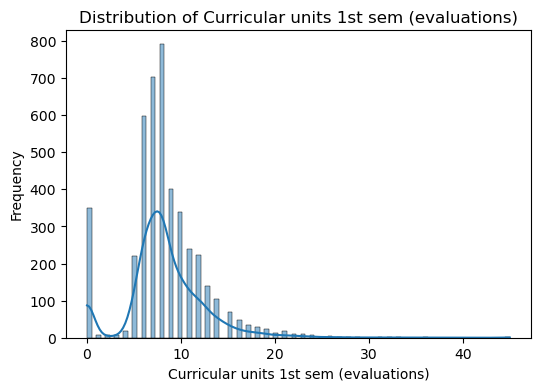

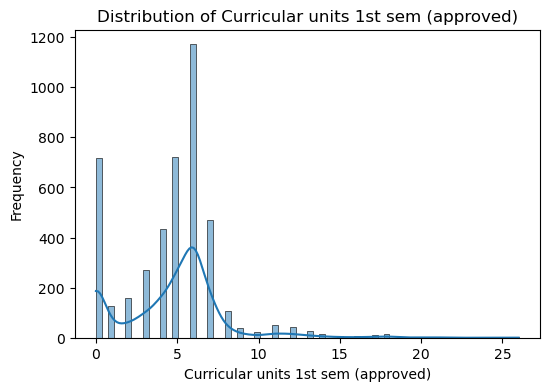

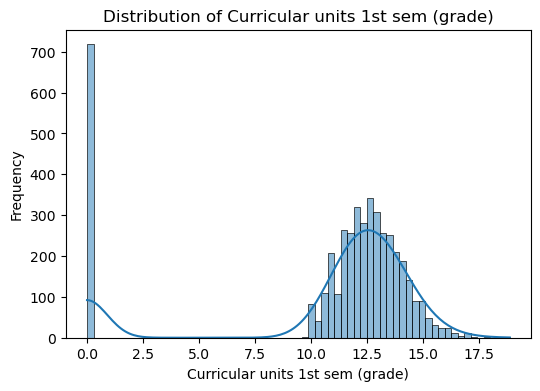

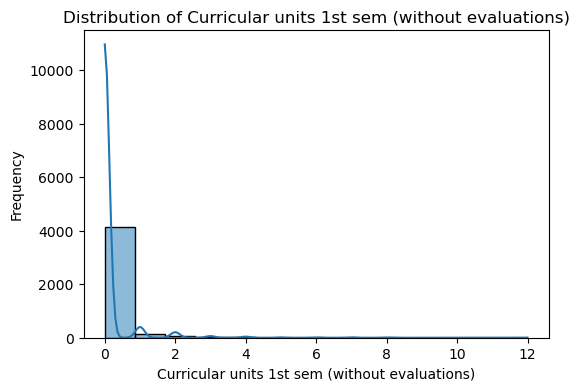

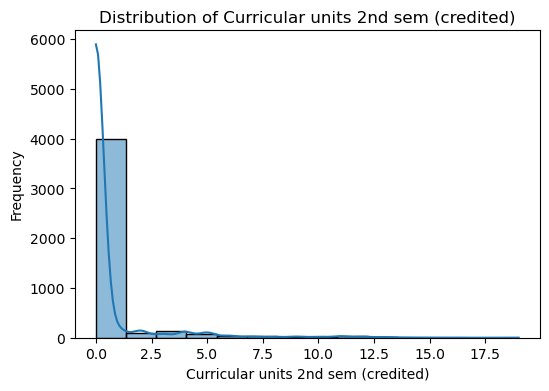

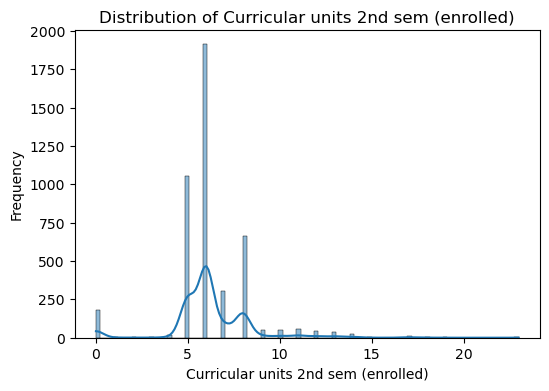

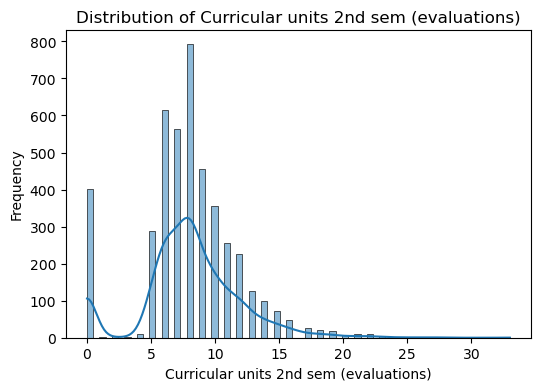

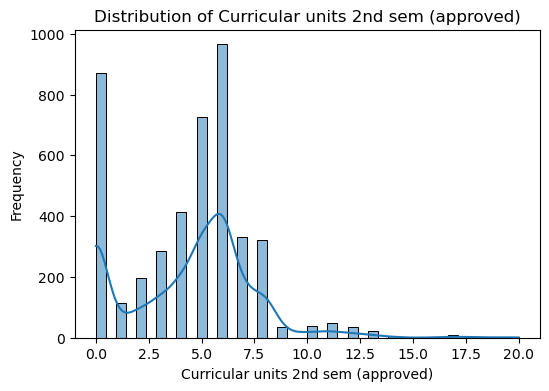

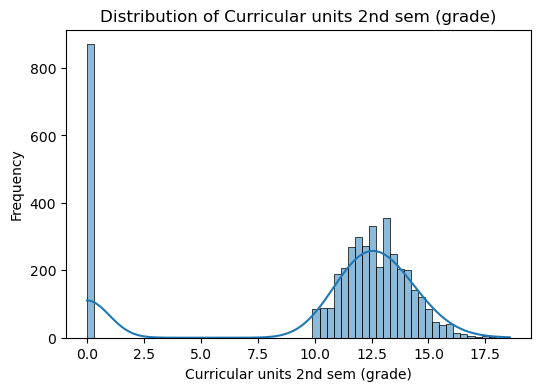

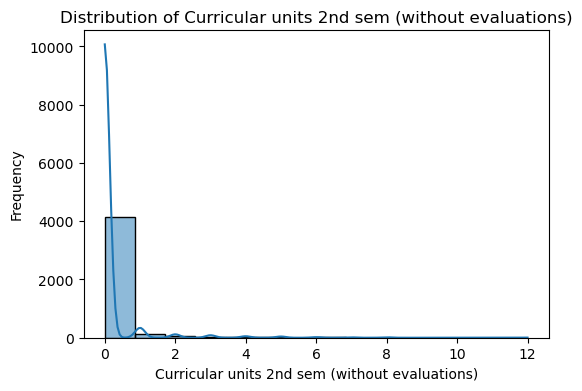

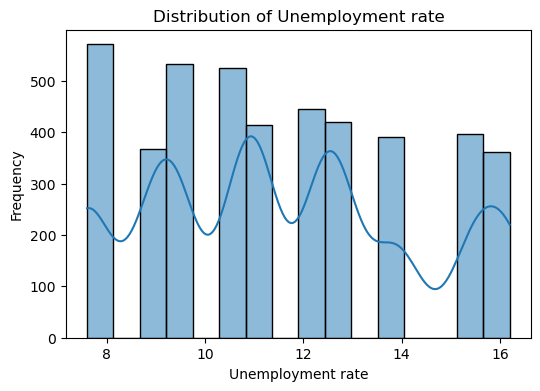

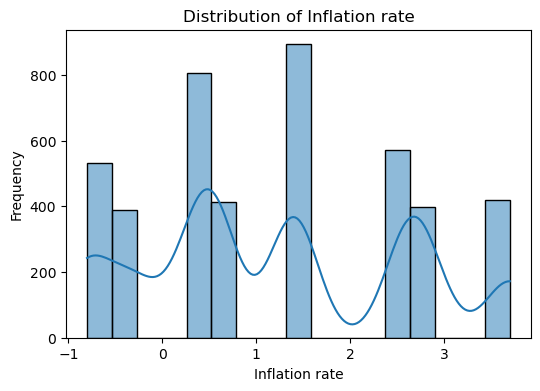

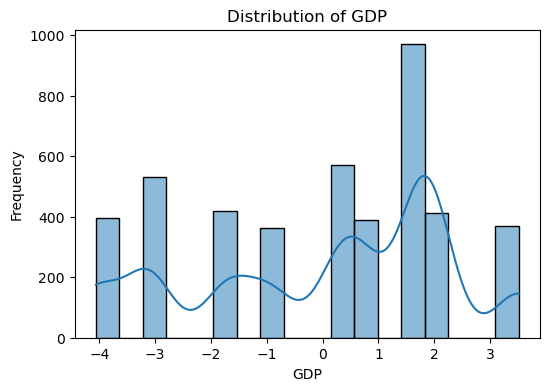

Box plots before outlier removal:


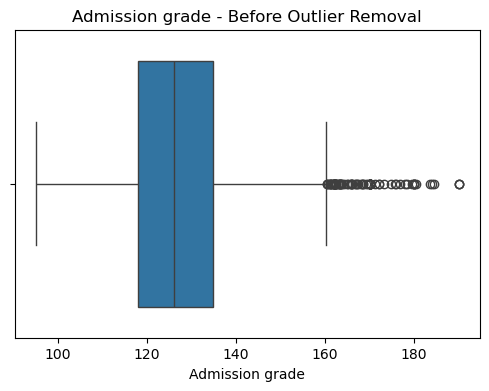

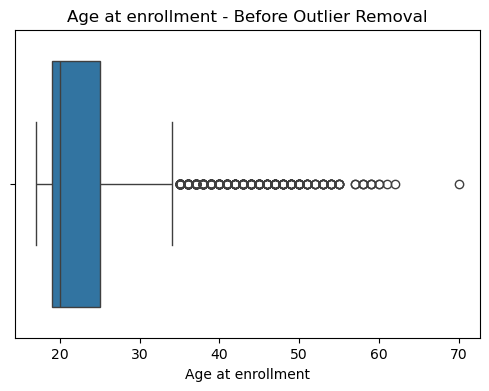

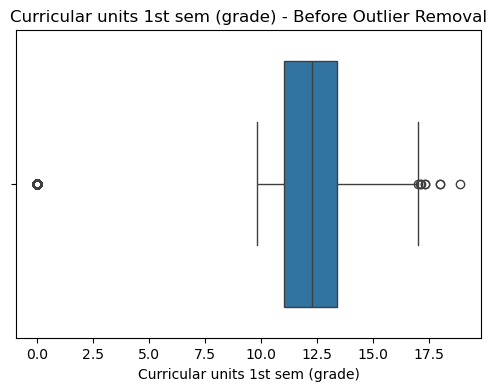

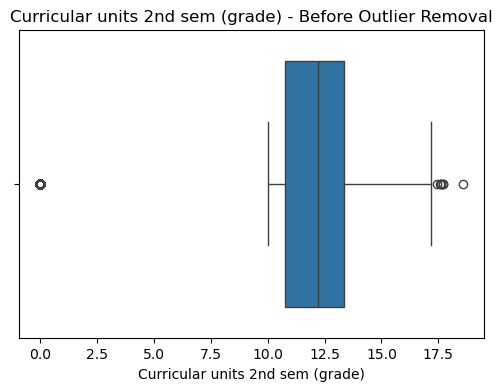

Box plots after outlier removal:


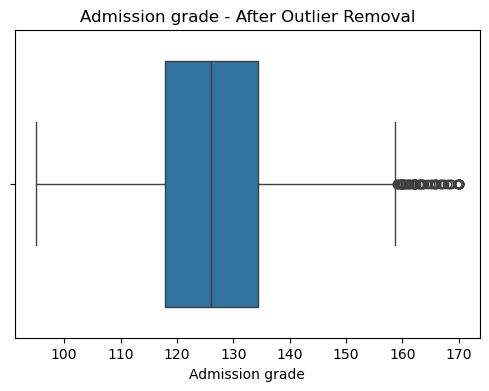

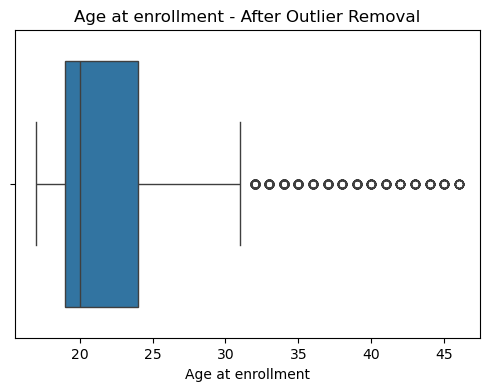

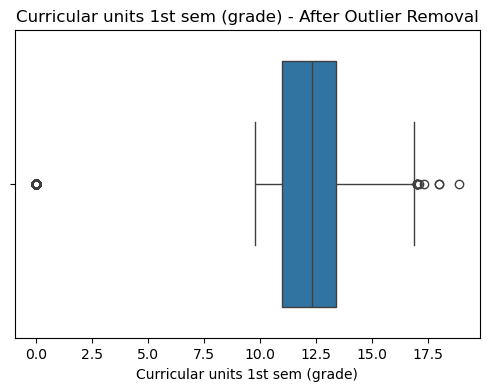

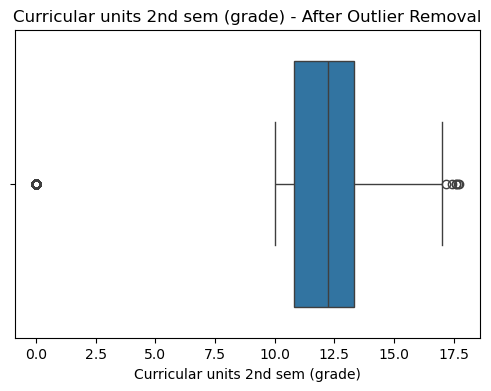

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo

dataset = fetch_ucirepo(id=697)
X = dataset.data.features  # Feature data
y = pd.DataFrame(dataset.data.targets, columns=['Target'])  # Target data

print("First 5 rows of feature data (X):")
print(X.head())

print("\nFirst 5 rows of target data (y):")
print(y.head())

print("\nSummary of feature data (X):")
print(X.describe())

print("\nMissing values per feature:")
print(X.isnull().sum())

print("\nOriginal Target Distribution:")
print(y['Target'].value_counts(normalize=True))

# Convert Target to Binary (Dropout vs Non-Dropout)
y_binary = y.copy()
y_binary['Target'] = y_binary['Target'].apply(lambda x: 1 if x == "Dropout" else 0)

print("\nBinary Target Distribution (Dropout = 1, Non-Dropout = 0):")
print(y_binary['Target'].value_counts(normalize=True))

#Recode Marital Status to Binary (0 = No, 1 = Yes)
X['Marital Status'] = X['Marital Status'].apply(lambda x: 1 if x == 2 else 0)

# Normalize Variables with Large Ranges
# List of columns to normalize based on initial exploration
columns_to_normalize = ['Course']

# Apply Min-Max scaling
scaler = MinMaxScaler()
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

X.rename(columns={'Nacionality': 'Nationality'}, inplace=True)


# Define Binary Variables and Customize Their Labels
binary_variables = {
    'Marital Status': 'Marital Status (0 = No, 1 = Yes)',
    'Daytime/evening attendance': 'Attendance (0 = Evening, 1 = Daytime)',
    'Displaced': 'Displaced (0 = No, 1 = Yes)',
    'Educational special needs': 'Educational Special Needs (0 = No, 1 = Yes)',
    'Debtor': 'Debtor (0 = No, 1 = Yes)',
    'Tuition fees up to date': 'Tuition Fees Up to Date (0 = No, 1 = Yes)',
    'Gender': 'Gender (0 = Female, 1 = Male)',
    'Scholarship holder': 'Scholarship Holder (0 = No, 1 = Yes)',
    'International': 'International (0 = No, 1 = Yes)'
}

# Plot Binary Target Variable with Labels
plt.figure(figsize=(6, 4))
sns.countplot(x=y_binary['Target'], palette='Set2')
plt.title("Binary Target Distribution: Dropout vs. Non-Dropout")
plt.xlabel("Target (0 = Non-Dropout, 1 = Dropout)")
plt.ylabel("Count")
plt.xticks([0, 1], ['0', '1'])
plt.show()



# Plot Binary Variables with 0 and 1 on x-axis and Clear Labels
for column, xlabel in binary_variables.items():
    plt.figure(figsize=(6, 4))
    sns.countplot(x=X[column], palette='Set2')
    plt.title(f"Distribution of {column}")
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.xticks([0, 1], ['0', '1'])  # Set x-axis to show only 0 and 1
    plt.show()

# Visualize Distributions of Numerical Features
numerical_data = X.select_dtypes(include=[np.number])
for column in numerical_data.columns:
    if column not in binary_variables:  # Avoid replotting binary variables
        plt.figure(figsize=(6, 4))
        sns.histplot(X[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

# Key Feature Analysis and Visualization by Dropout Status
key_features = ['Admission grade', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Box plots before outlier removal
print("Box plots before outlier removal:")
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X[feature])
    plt.title(f"{feature} - Before Outlier Removal")
    plt.xlabel(feature)
    plt.show()

# Outlier Removal using Z-score
X_no_outliers = X[(np.abs(stats.zscore(X[key_features])) < 3).all(axis=1)]

# Box plots after outlier removal
print("Box plots after outlier removal:")
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X_no_outliers[feature])
    plt.title(f"{feature} - After Outlier Removal")
    plt.xlabel(feature)
    plt.show()



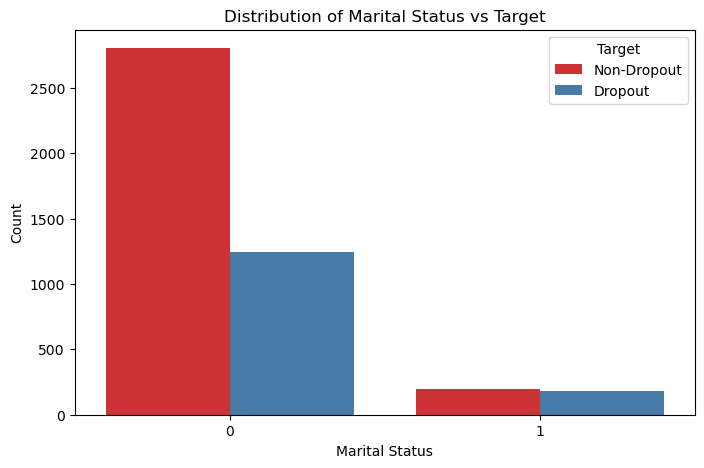

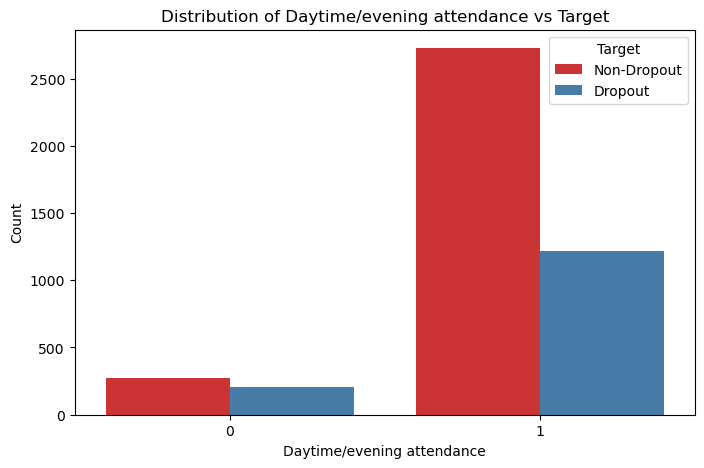

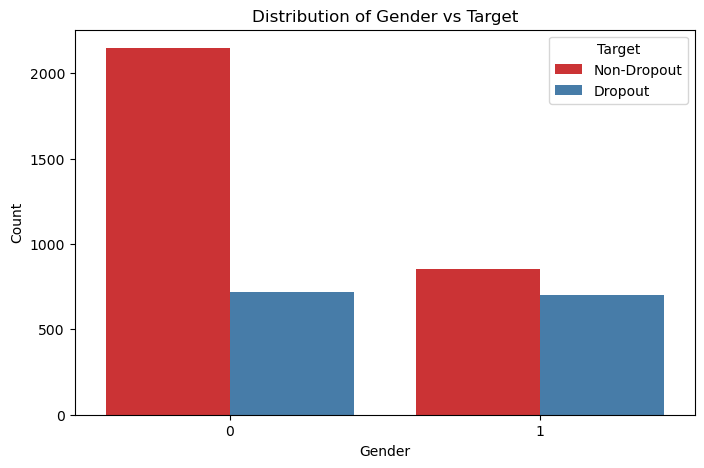

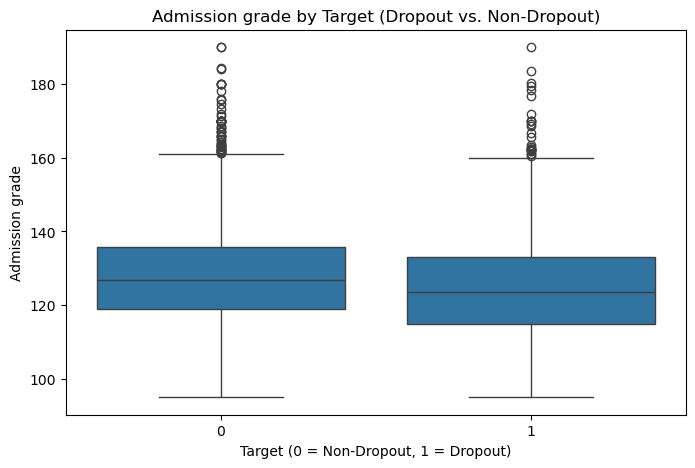

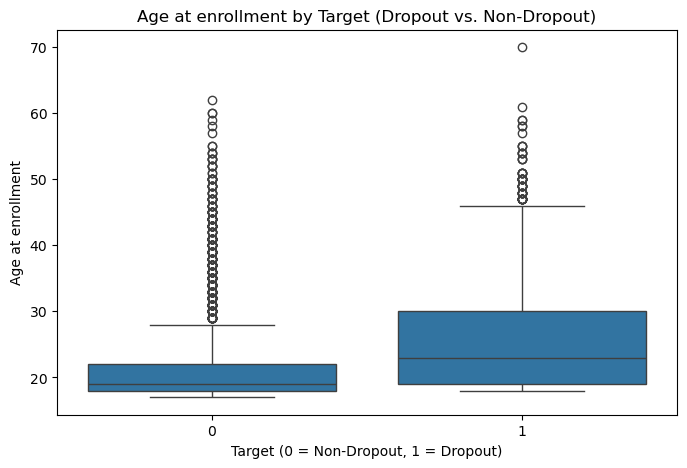

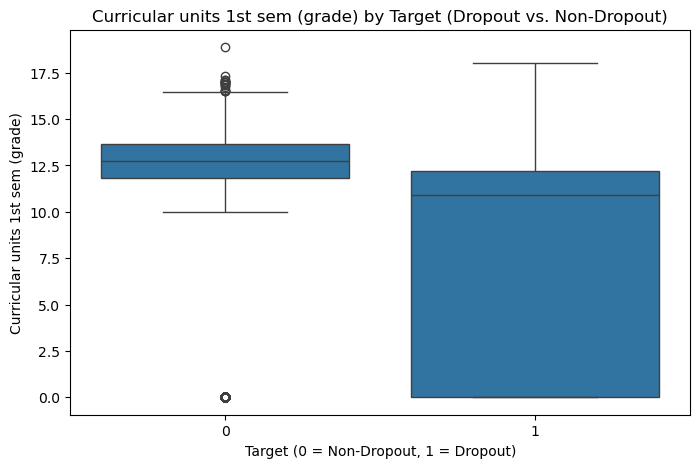

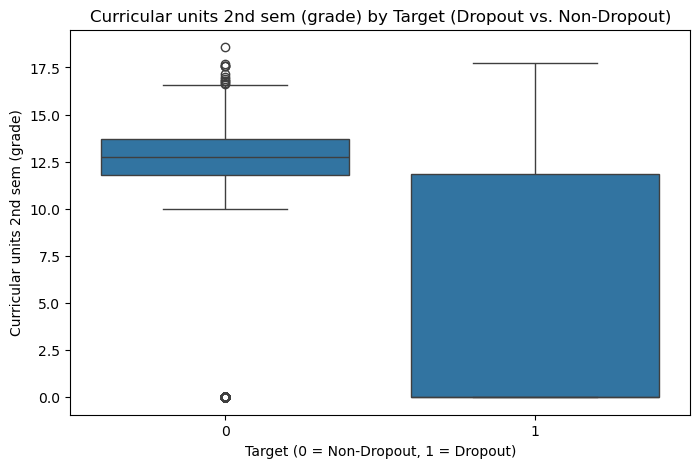

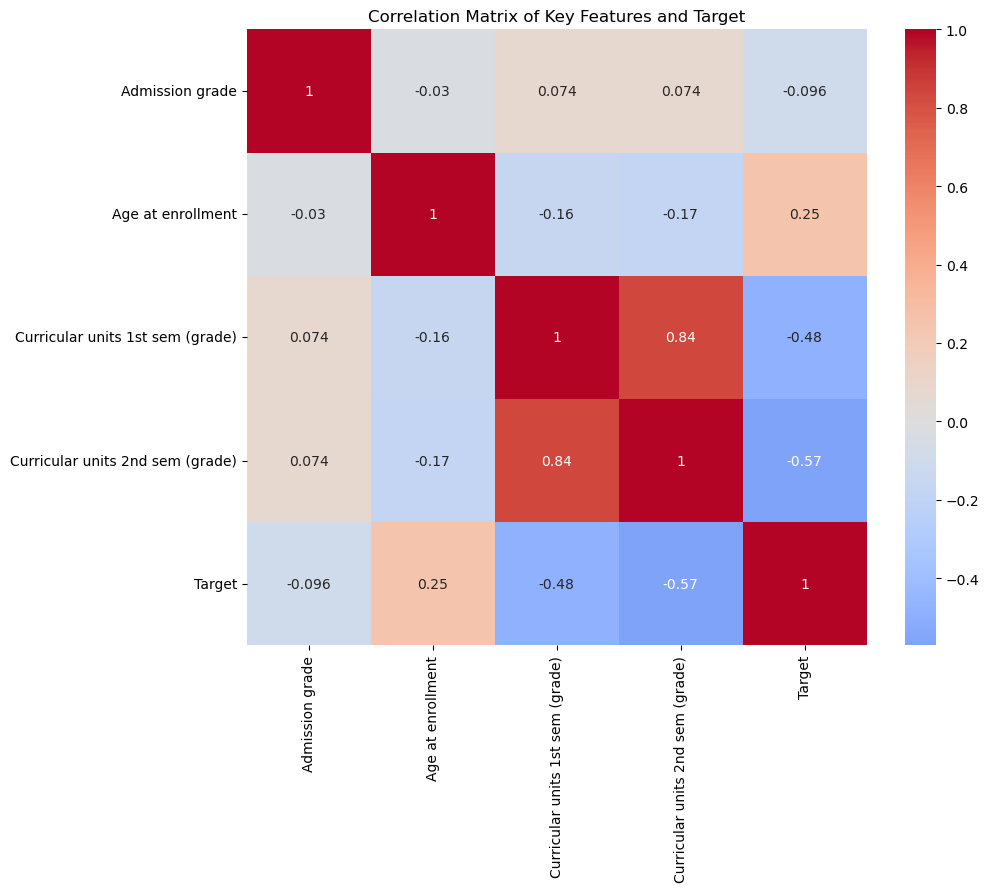

C:\Users\mraml\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Number of outliers detected: Marital Status                                    379
Application mode                                    0
Application order                                 138
Course                                            227
Daytime/evening attendance                          0
Previous qualification                            308
Previous qualification (grade)                     21
Nationality                                        74
Mother's qualification                              0
Father's qualification                              0
Mother's occupation                               112
Father's occupation                               177
Admission grade                                    22
Displaced                                           0
Educational special needs                          51
Debtor                                              0
Tuition fees up to date                             0
Gender                                              0

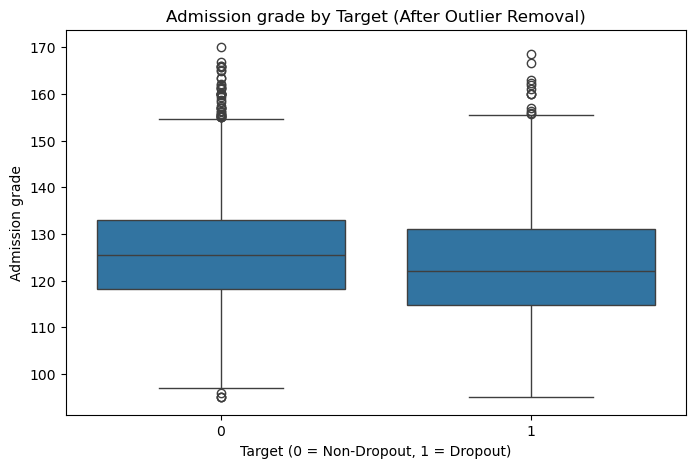

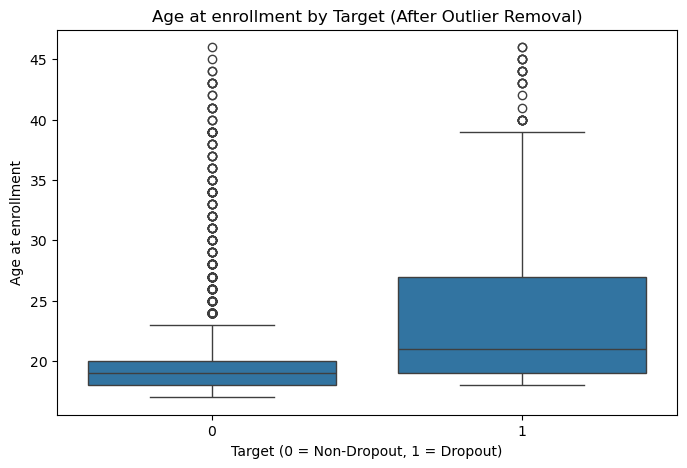

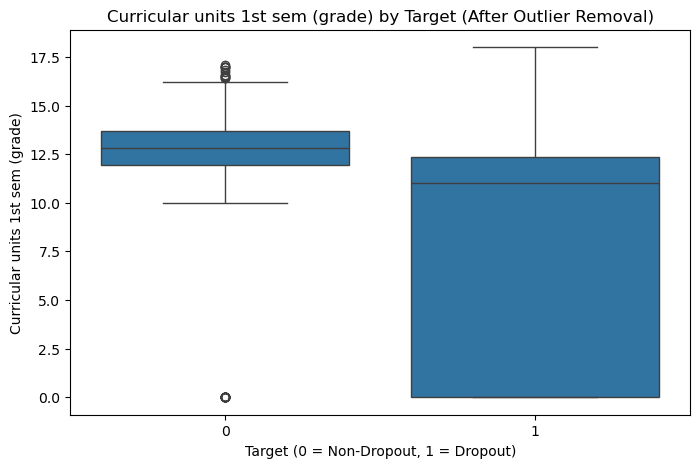

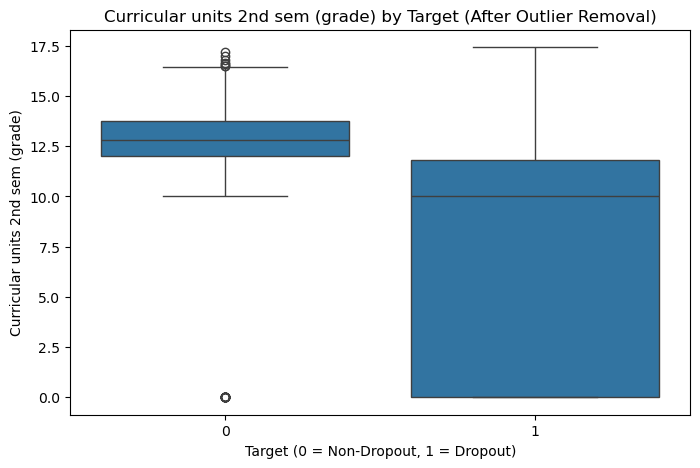

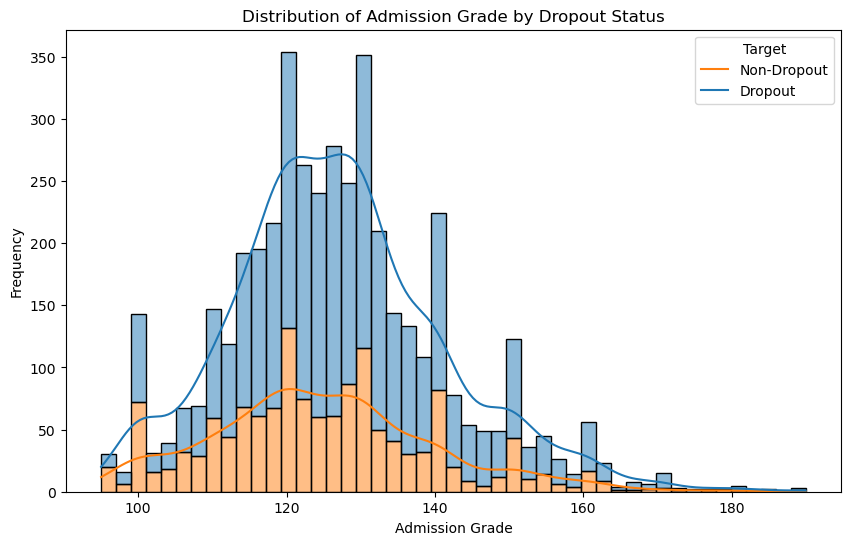

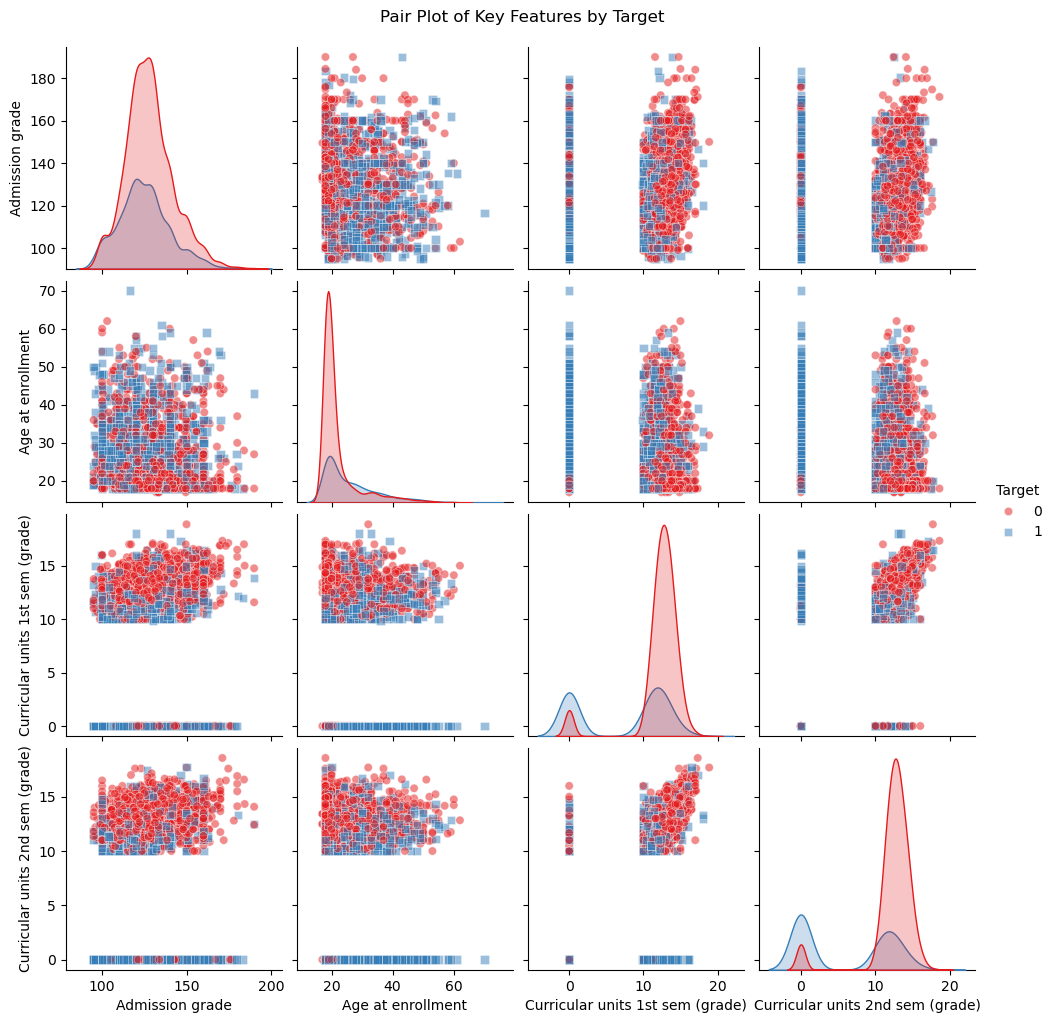

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

data = pd.concat([X, y_binary['Target']], axis=1)

### 1. Target Analysis Across Key Categorical Features ###
categorical_features = ['Marital Status', 'Daytime/evening attendance', 'Gender']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Target', data=data, palette='Set1')
    plt.title(f"Distribution of {feature} vs Target")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='Target', loc='upper right', labels=['Non-Dropout', 'Dropout'])
    plt.show()

### 2. Box Plots to Highlight Potential Outliers ###
key_features = ['Admission grade', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Target', y=feature, data=data)
    plt.title(f"{feature} by Target (Dropout vs. Non-Dropout)")
    plt.xlabel("Target (0 = Non-Dropout, 1 = Dropout)")
    plt.ylabel(feature)
    plt.show()

### 3. Correlation Analysis ###
correlation_data = data[key_features + ['Target']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Key Features and Target")
plt.show()

### 4. Outlier Detection and Removal ###
z_scores = np.abs(stats.zscore(X.select_dtypes(include=[np.number])))
outliers = (z_scores > 3)
print(f"Number of outliers detected: {np.sum(outliers)}")

# Remove outliers for cleaner data visualization and analysis
data_no_outliers = data[(np.abs(stats.zscore(X.select_dtypes(include=[np.number]))) < 3).all(axis=1)]
print("\nData shape before outlier removal:", data.shape)
print("Data shape after outlier removal:", data_no_outliers.shape)

# Re-plot box plots after outlier removal for comparison
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Target', y=feature, data=data_no_outliers)
    plt.title(f"{feature} by Target (After Outlier Removal)")
    plt.xlabel("Target (0 = Non-Dropout, 1 = Dropout)")
    plt.ylabel(feature)
    plt.show()


# Distribution of key feature "Admission Grade" by target to see if academic performance links to dropout rates
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Admission grade", hue="Target", multiple="stack", kde=True)
plt.title("Distribution of Admission Grade by Dropout Status")
plt.xlabel("Admission Grade")
plt.ylabel("Frequency")
plt.legend(title='Target', loc='upper right', labels=['Non-Dropout', 'Dropout'])
plt.show()

# Pair plot of key features to visually assess relationships and class separation
sns.pairplot(data=data, vars=key_features, hue="Target", palette="Set1", markers=["o", "s"], plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Key Features by Target", y=1.02)
plt.show()


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Extract features and target
X = pd.DataFrame(dataset.data.features)  # Features
y = pd.DataFrame(dataset.data.targets, columns=['Target'])  # Target

# Binary conversion for target
y['Target'] = y['Target'].apply(lambda x: 1 if x == "Dropout" else 0)

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.dropna(inplace=True)
X = X.loc[y.index]  # Align indexes

# Validate dataset sizes
print("X shape after cleaning:", X.shape)
print("y shape after cleaning:", y.shape)

# Split into training and testing sets
if X.shape[0] > 0 and y.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print("Training set size:", X_train.shape[0])
    print("Test set size:", X_test.shape[0])
else:
    print("Dataset is empty after cleaning!")

# SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Perform Logistic Regression with detailed settings
logistic_model = LogisticRegression(max_iter=5000, random_state=42, solver='saga', penalty='l2', C=1e4)
logistic_model.fit(X_train_scaled, y_train_balanced.values.ravel())  # Convert y_train to a 1D array

# Logistic Regression Coefficients
coefficients = pd.DataFrame({
    "Features": X.columns,
    "Coefficients": logistic_model.coef_[0]
}).sort_values(by="Coefficients", key=abs, ascending=False)

print("\nLogistic Regression Coefficients:")
print(coefficients)

# Calculate AIC (Akaike Information Criterion)
def calculate_aic(y_true, y_pred, model, n_features):
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    n = len(y_true)
    aic = n * np.log(residual_sum_of_squares / n) + 2 * (n_features + 1)
    return aic

y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]
aic = calculate_aic(y_test.values.ravel(), y_pred_proba, logistic_model, X_train.shape[1])

print("\nLogistic Regression AIC:")
print(aic)

# Logistic Regression Predictions and Metrics
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("\nLogistic Regression Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))


X shape after cleaning: (4424, 36)
y shape after cleaning: (4424, 1)
Training set size: 3539
Test set size: 885

Logistic Regression Coefficients:
                                          Features  Coefficients
30             Curricular units 2nd sem (approved)     -2.270459
28             Curricular units 2nd sem (enrolled)      1.384658
16                         Tuition fees up to date     -1.180333
24             Curricular units 1st sem (approved)     -1.055097
21             Curricular units 1st sem (credited)      0.725219
22             Curricular units 1st sem (enrolled)     -0.594851
25                Curricular units 1st sem (grade)      0.509832
27             Curricular units 2nd sem (credited)      0.399457
18                              Scholarship holder     -0.399273
20                                   International     -0.365608
31                Curricular units 2nd sem (grade)     -0.348204
3                                           Course      0.346689
10      

In [84]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train, y_train.values.ravel())


# Perform Support Vector Machine (SVM) with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf.fit(X_train, y_train.values.ravel())  # Convert y_train to a 1D array

# SVM RBF Predictions
y_pred_svm_rbf = svm_rbf.predict(X_test)

# Evaluate SVM with RBF Kernel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("SVM with RBF Kernel Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))


SVM with RBF Kernel Metrics:
Confusion Matrix:
 [[545  24]
 [164 152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85       569
           1       0.86      0.48      0.62       316

    accuracy                           0.79       885
   macro avg       0.82      0.72      0.74       885
weighted avg       0.80      0.79      0.77       885

Accuracy: 0.7875706214689265


In [54]:
# SVM RBF Metrics
print("SVM with RBF Kernel Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))

SVM with RBF Kernel Metrics:
Confusion Matrix:
 [[545  24]
 [164 152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85       569
           1       0.86      0.48      0.62       316

    accuracy                           0.79       885
   macro avg       0.82      0.72      0.74       885
weighted avg       0.80      0.79      0.77       885

Accuracy: 0.7875706214689265


In [60]:
# Step 4: Compare Logistic Regression and SVM
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM (RBF)"],
    "Accuracy": [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_svm_rbf)]
})
print("\nComparison of Models:")
print(comparison)



Comparison of Models:
                 Model  Accuracy
0  Logistic Regression  0.865537
1            SVM (RBF)  0.787571


In [64]:
# Step 5: Compare SVM Kernels (Linear, Polynomial, Sigmoid)
kernels = ['linear', 'poly', 'sigmoid']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42, probability=True)
    svm_model.fit(X_train, y_train.values.ravel())  # Convert y_train to a 1D array
    y_pred_kernel = svm_model.predict(X_test)

    print(f"\nSVM with {kernel} Kernel Metrics:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_kernel))
    print("Classification Report:\n", classification_report(y_test, y_pred_kernel))
    print("Accuracy:", accuracy_score(y_test, y_pred_kernel))



SVM with linear Kernel Metrics:
Confusion Matrix:
 [[540  29]
 [100 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       569
           1       0.88      0.68      0.77       316

    accuracy                           0.85       885
   macro avg       0.86      0.82      0.83       885
weighted avg       0.86      0.85      0.85       885

Accuracy: 0.8542372881355932

SVM with poly Kernel Metrics:
Confusion Matrix:
 [[544  25]
 [163 153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85       569
           1       0.86      0.48      0.62       316

    accuracy                           0.79       885
   macro avg       0.81      0.72      0.74       885
weighted avg       0.80      0.79      0.77       885

Accuracy: 0.7875706214689265

SVM with sigmoid Kernel Metrics:
Confusion Matrix:
 [[506  63]
 [186 130]]
Classification R

In [68]:
svm_models = {
    "RBF": svm_rbf,
    "Linear": SVC(kernel='linear', random_state=42, probability=True),
    "Poly": SVC(kernel='poly', random_state=42, probability=True),
    "Sigmoid": SVC(kernel='sigmoid', random_state=42, probability=True)
}

results = {}
for name, model in svm_models.items():
    model.fit(X_train, y_train.values.ravel())  # Convert y_train to a 1D array
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

# Display results
print("SVM Kernel Performance Comparison:")
for kernel, accuracy in results.items():
    print(f"{kernel} Kernel Accuracy: {accuracy}")


SVM Kernel Performance Comparison:
RBF Kernel Accuracy: 0.7875706214689265
Linear Kernel Accuracy: 0.8542372881355932
Poly Kernel Accuracy: 0.7875706214689265
Sigmoid Kernel Accuracy: 0.7186440677966102


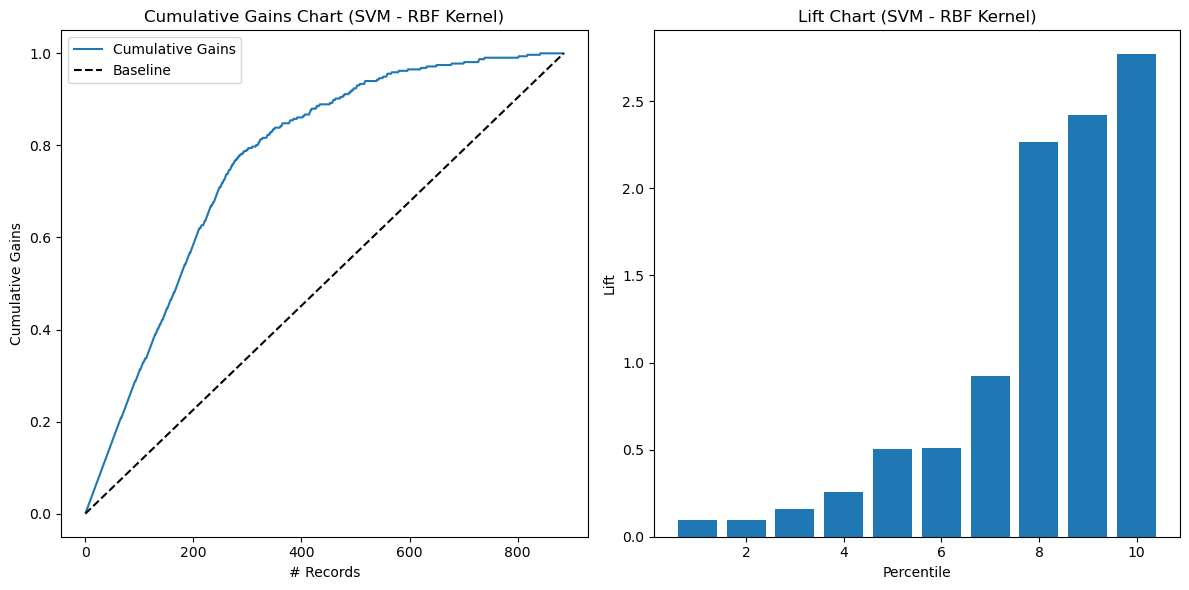

In [72]:
# Perform SVM with RBF Kernel and Generate Gains and Lift Charts
svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf.fit(X_train_scaled, y_train.values.ravel())

# Predict and get probabilities
y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)
y_proba_svm_rbf = svm_rbf.predict_proba(X_test_scaled)

# Create DataFrame for Gains and Lift Charts
svm_rbf_results = pd.DataFrame({
    "actual": y_test.values.ravel(),
    "p(0)": y_proba_svm_rbf[:, 0],
    "p(1)": y_proba_svm_rbf[:, 1],
    "predicted": y_pred_svm_rbf
}).sort_values(by="p(1)", ascending=False)

# Generate Charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gains Chart
svm_rbf_results["cumulative_actuals"] = svm_rbf_results["actual"].cumsum()
svm_rbf_results["cumulative_total"] = range(1, len(svm_rbf_results) + 1)
svm_rbf_results["cumulative_gains"] = svm_rbf_results["cumulative_actuals"] / svm_rbf_results["actual"].sum()

axes[0].plot(svm_rbf_results["cumulative_total"], svm_rbf_results["cumulative_gains"], label="Cumulative Gains")
axes[0].plot([0, len(svm_rbf_results)], [0, 1], 'k--', label="Baseline")
axes[0].set_title("Cumulative Gains Chart (SVM - RBF Kernel)")
axes[0].set_xlabel("# Records")
axes[0].set_ylabel("Cumulative Gains")
axes[0].legend()

# Lift Chart
svm_rbf_results["percentile"] = pd.qcut(svm_rbf_results["p(1)"], 10, labels=False, duplicates="drop") + 1
df_lift = svm_rbf_results.groupby("percentile").agg(
    lift=("actual", "mean")
).reset_index()
df_lift["lift"] = df_lift["lift"] / svm_rbf_results["actual"].mean()

axes[1].bar(df_lift["percentile"], df_lift["lift"])
axes[1].set_title("Lift Chart (SVM - RBF Kernel)")
axes[1].set_xlabel("Percentile")
axes[1].set_ylabel("Lift")

plt.tight_layout()
plt.show()


In [92]:
pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.7 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 413.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.7/390.3 MB 14.5 MB/s eta 0:00:27
   ---------------------------------------- 1.7/390.3 MB 17.9 MB/s eta 0:00:22
   ---------------------------------------- 3.1/390.3 MB 19.8 MB/s eta 0:00:20
   ---------------------------------------- 4.2/390.3 MB 20.9 MB/s eta 0:00:19
   ---------------------------------------- 4.2/390.3 MB 20.9 MB/s eta 0:00:19
   ---------------------------------------- 4.3/390.3 MB 14.5 MB/s eta 0:00:27
   ---------------------------------------- 4.3/390.3 MB 14.5 MB/s eta 0:00:27
   ---------------------------------------- 4.6/390.3 MB 11.0 MB/s eta 0:00:35
    --------------------------------------- 7.2/390.3 MB 16.0 MB

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.7221 - loss: 0.5791 - val_accuracy: 0.7876 - val_loss: 0.4937
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8307 - loss: 0.4339 - val_accuracy: 0.8056 - val_loss: 0.4714
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8255 - loss: 0.4208 - val_accuracy: 0.7989 - val_loss: 0.4649
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8285 - loss: 0.4125 - val_accuracy: 0.8169 - val_loss: 0.4307
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8398 - loss: 0.3791 - val_accuracy: 0.8249 - val_loss: 0.4188
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8547 - loss: 0.3653 - val_accuracy: 0.8169 - val_loss: 0.4262
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8359 - loss: 0.3714 - val_accuracy: 0.8237 - val_loss: 0.4208
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.8515 - loss: 0.3423 - val_accuracy: 0.8226 - 

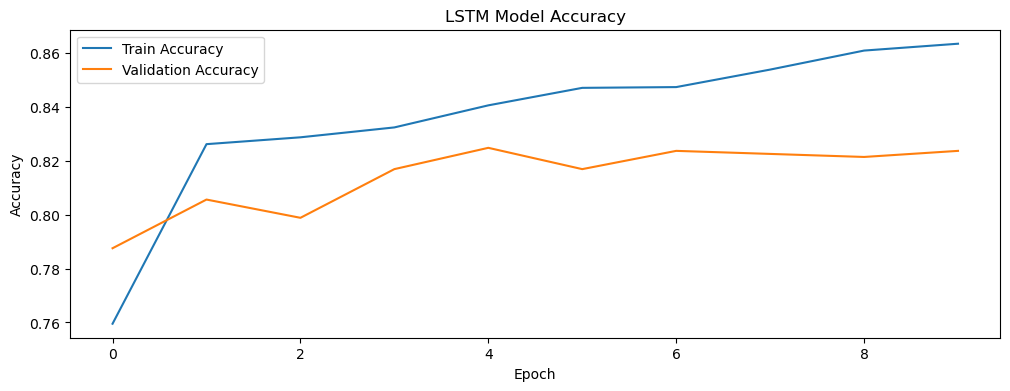

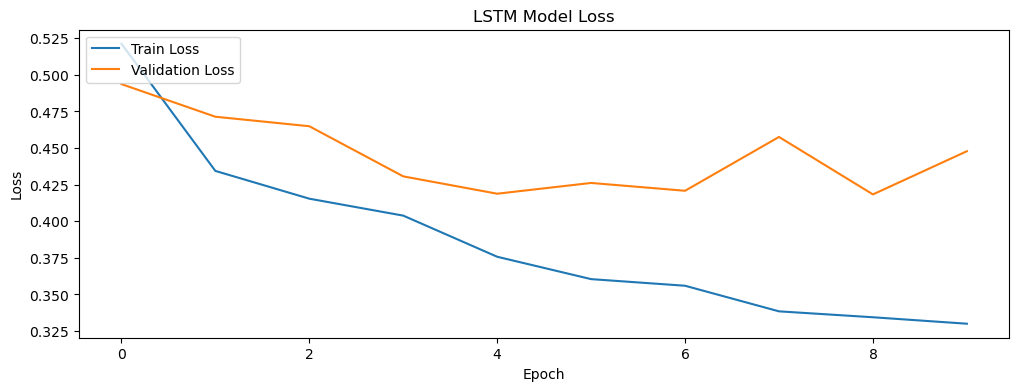

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.metrics import accuracy_score

# Define LSTM Model
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=20000, output_dim=128))
LSTM_model.add(LSTM(128))
LSTM_model.add(Dense(1, activation='sigmoid'))
LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM Model
history_LSTM = LSTM_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

# Evaluate LSTM Model
LSTM_train_accuracy = LSTM_model.evaluate(X_train, y_train, verbose=0)[1]
LSTM_test_accuracy = LSTM_model.evaluate(X_test, y_test, verbose=0)[1]

# Plot LSTM Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(history_LSTM.history['accuracy'], label='Train Accuracy')
plt.plot(history_LSTM.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(history_LSTM.history['loss'], label='Train Loss')
plt.plot(history_LSTM.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.7444 - loss: 0.5134 - val_accuracy: 0.8452 - val_loss: 0.3873
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8712 - loss: 0.3274 - val_accuracy: 0.8407 - val_loss: 0.3989
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8721 - loss: 0.3157 - val_accuracy: 0.8599 - val_loss: 0.3658
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8791 - loss: 0.3124 - val_accuracy: 0.8463 - val_loss: 0.3734
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8849 - loss: 0.2979 - val_accuracy: 0.8362 - val_loss: 0.3909
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8905 - loss: 0.2771 - val_accuracy: 0.8429 - val_loss: 0.3822
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8905 - loss: 0.2905 - val_accuracy: 0.8362 - val_loss: 0.4084
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8884 - loss: 0.2763 - val_accuracy: 0.8339 - v

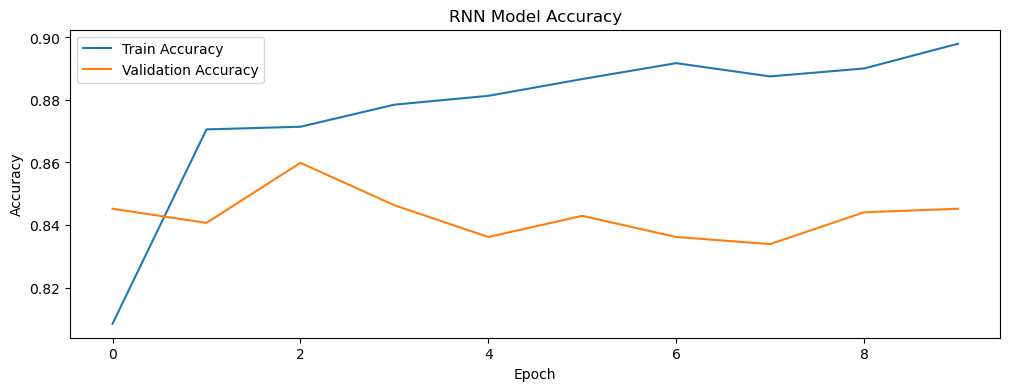

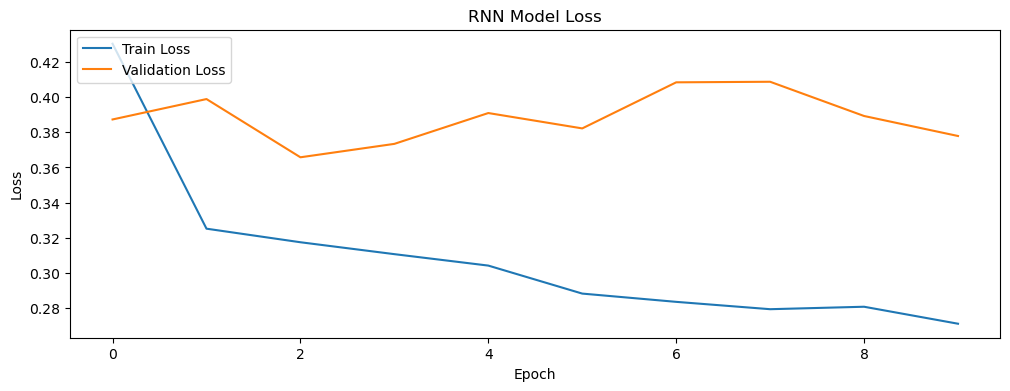

In [99]:
from tensorflow.keras.layers import SimpleRNN

# Define RNN Model
RNN_model = Sequential()
RNN_model.add(Embedding(input_dim=20000, output_dim=128))
RNN_model.add(SimpleRNN(128))
RNN_model.add(Dense(1, activation='sigmoid'))
RNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train RNN Model
history_RNN = RNN_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

# Evaluate RNN Model
RNN_train_accuracy = RNN_model.evaluate(X_train, y_train, verbose=0)[1]
RNN_test_accuracy = RNN_model.evaluate(X_test, y_test, verbose=0)[1]

# Plot RNN Training History
plt.figure(figsize=(12, 4))
plt.plot(history_RNN.history['accuracy'], label='Train Accuracy')
plt.plot(history_RNN.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(history_RNN.history['loss'], label='Train Loss')
plt.plot(history_RNN.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [151]:
data = {
    "Model": ["Logistic Regression", "Support Vector Machine", "LSTM", "RNN"],
    "Train Accuracy": [logistic_train_accuracy, svm_train_accuracy, LSTM_train_accuracy, RNN_train_accuracy],
    "Test Accuracy": [logistic_test_accuracy, svm_test_accuracy, LSTM_test_accuracy, RNN_test_accuracy]
}

accuracy_df = pd.DataFrame(data)

# Display the DataFrame
print(accuracy_df)

                    Model  Train Accuracy  Test Accuracy
0     Logistic Regression        0.816763       0.837288
1  Support Vector Machine        0.879622       0.873446
2                    LSTM        0.862108       0.838418
3                     RNN        0.864934       0.848588


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


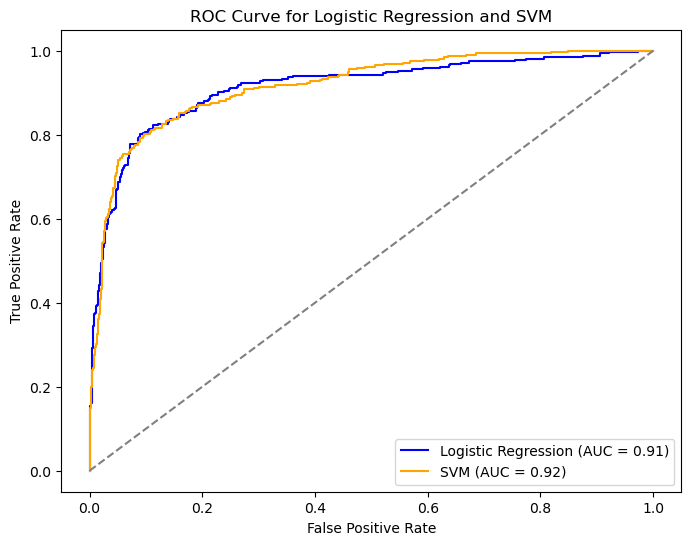

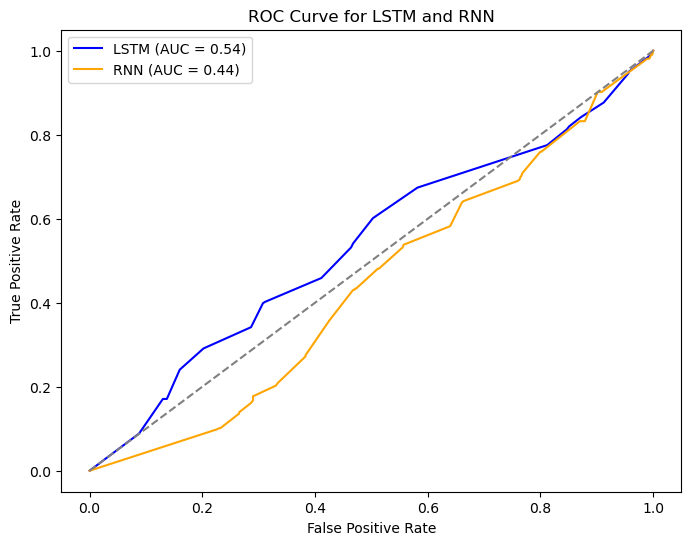

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

if 'Course' in X_train.columns:
    train_data = X_train['Course'].astype(str) 
    test_data = X_test['Course'].astype(str) 
else:
    raise ValueError("The column 'Course' does not exist in the dataset.")

# Tokenizer and padding
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data)

train_sequences = tokenizer.texts_to_sequences(train_data)
train_padded = pad_sequences(train_sequences, maxlen=50, padding='post')

test_sequences = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequences, maxlen=50, padding='post')

# Logistic Regression AUC/ROC
logistic_probs = logistic_model.predict_proba(X_test_scaled)[:, 1]
logistic_auc = roc_auc_score(y_test, logistic_probs)
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)

# SVM AUC/ROC
svm_probs = svm_rbf.decision_function(X_test_scaled)
svm_auc = roc_auc_score(y_test, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# LSTM Predictions and AUC
lstm_probs = LSTM_model.predict(test_padded).flatten()
lstm_auc = roc_auc_score(y_test, lstm_probs)
lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_probs)

# RNN Predictions and AUC
rnn_probs = RNN_model.predict(test_padded).flatten()
rnn_auc = roc_auc_score(y_test, rnn_probs)
rnn_fpr, rnn_tpr, _ = roc_curve(y_test, rnn_probs)

# Plotting AUC/ROC for Logistic Regression and SVM
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f"Logistic Regression (AUC = {logistic_auc:.2f})", color='blue')
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_auc:.2f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal for random predictions
plt.title("ROC Curve for Logistic Regression and SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Plotting AUC/ROC for LSTM and RNN
plt.figure(figsize=(8, 6))
plt.plot(lstm_fpr, lstm_tpr, label=f"LSTM (AUC = {lstm_auc:.2f})", color='blue')
plt.plot(rnn_fpr, rnn_tpr, label=f"RNN (AUC = {rnn_auc:.2f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal for random predictions
plt.title("ROC Curve for LSTM and RNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
